In [338]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Kaggle reference

https://www.kaggle.com/code/ambarish/austin-bike-eda-heatmaps-timeseries

# Rest of Notebook

In [339]:
Austin= pd.read_csv('Austin_new_data.csv', encoding='utf-8')

In [340]:
Austin

,count,year,month,weekday,hour,date,temperature,feels_like,humidity,wind_speed,is_holiday,weather_category,zone_start
0,1,2018,4,2,18,2018-04-03,22,20,93,24,0,2,48453001738
1,1,2018,4,3,15,2018-04-04,14,13,58,23,0,1,48453001200
2,1,2018,4,3,17,2018-04-04,14,13,58,23,0,1,48453001100
3,1,2018,4,4,5,2018-04-05,18,12,54,8,0,1,48453001305
4,2,2018,4,4,8,2018-04-05,18,12,54,8,0,1,48453001305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858599,3,2022,4,1,10,2022-04-04,21,19,88,21,0,2,48453001911
858600,1,2022,4,1,10,2022-04-04,21,19,88,21,0,2,48453001919
858601,1,2022,4,1,10,2022-04-04,21,19,88,21,0,2,48453002304
858602,1,2022,4,1,10,2022-04-04,21,19,88,21,0,2,48453002316


In [341]:
# Download Data
df = pd.read_csv('Austin_new_data.csv', encoding='utf-8')

df.drop('date', axis=1, inplace=True)


In [342]:
data_1100 = df[(df['zone_start'] == 48453001100) & (df['month'] == 3) & (df['weekday'].isin([1, 2, 3]))]

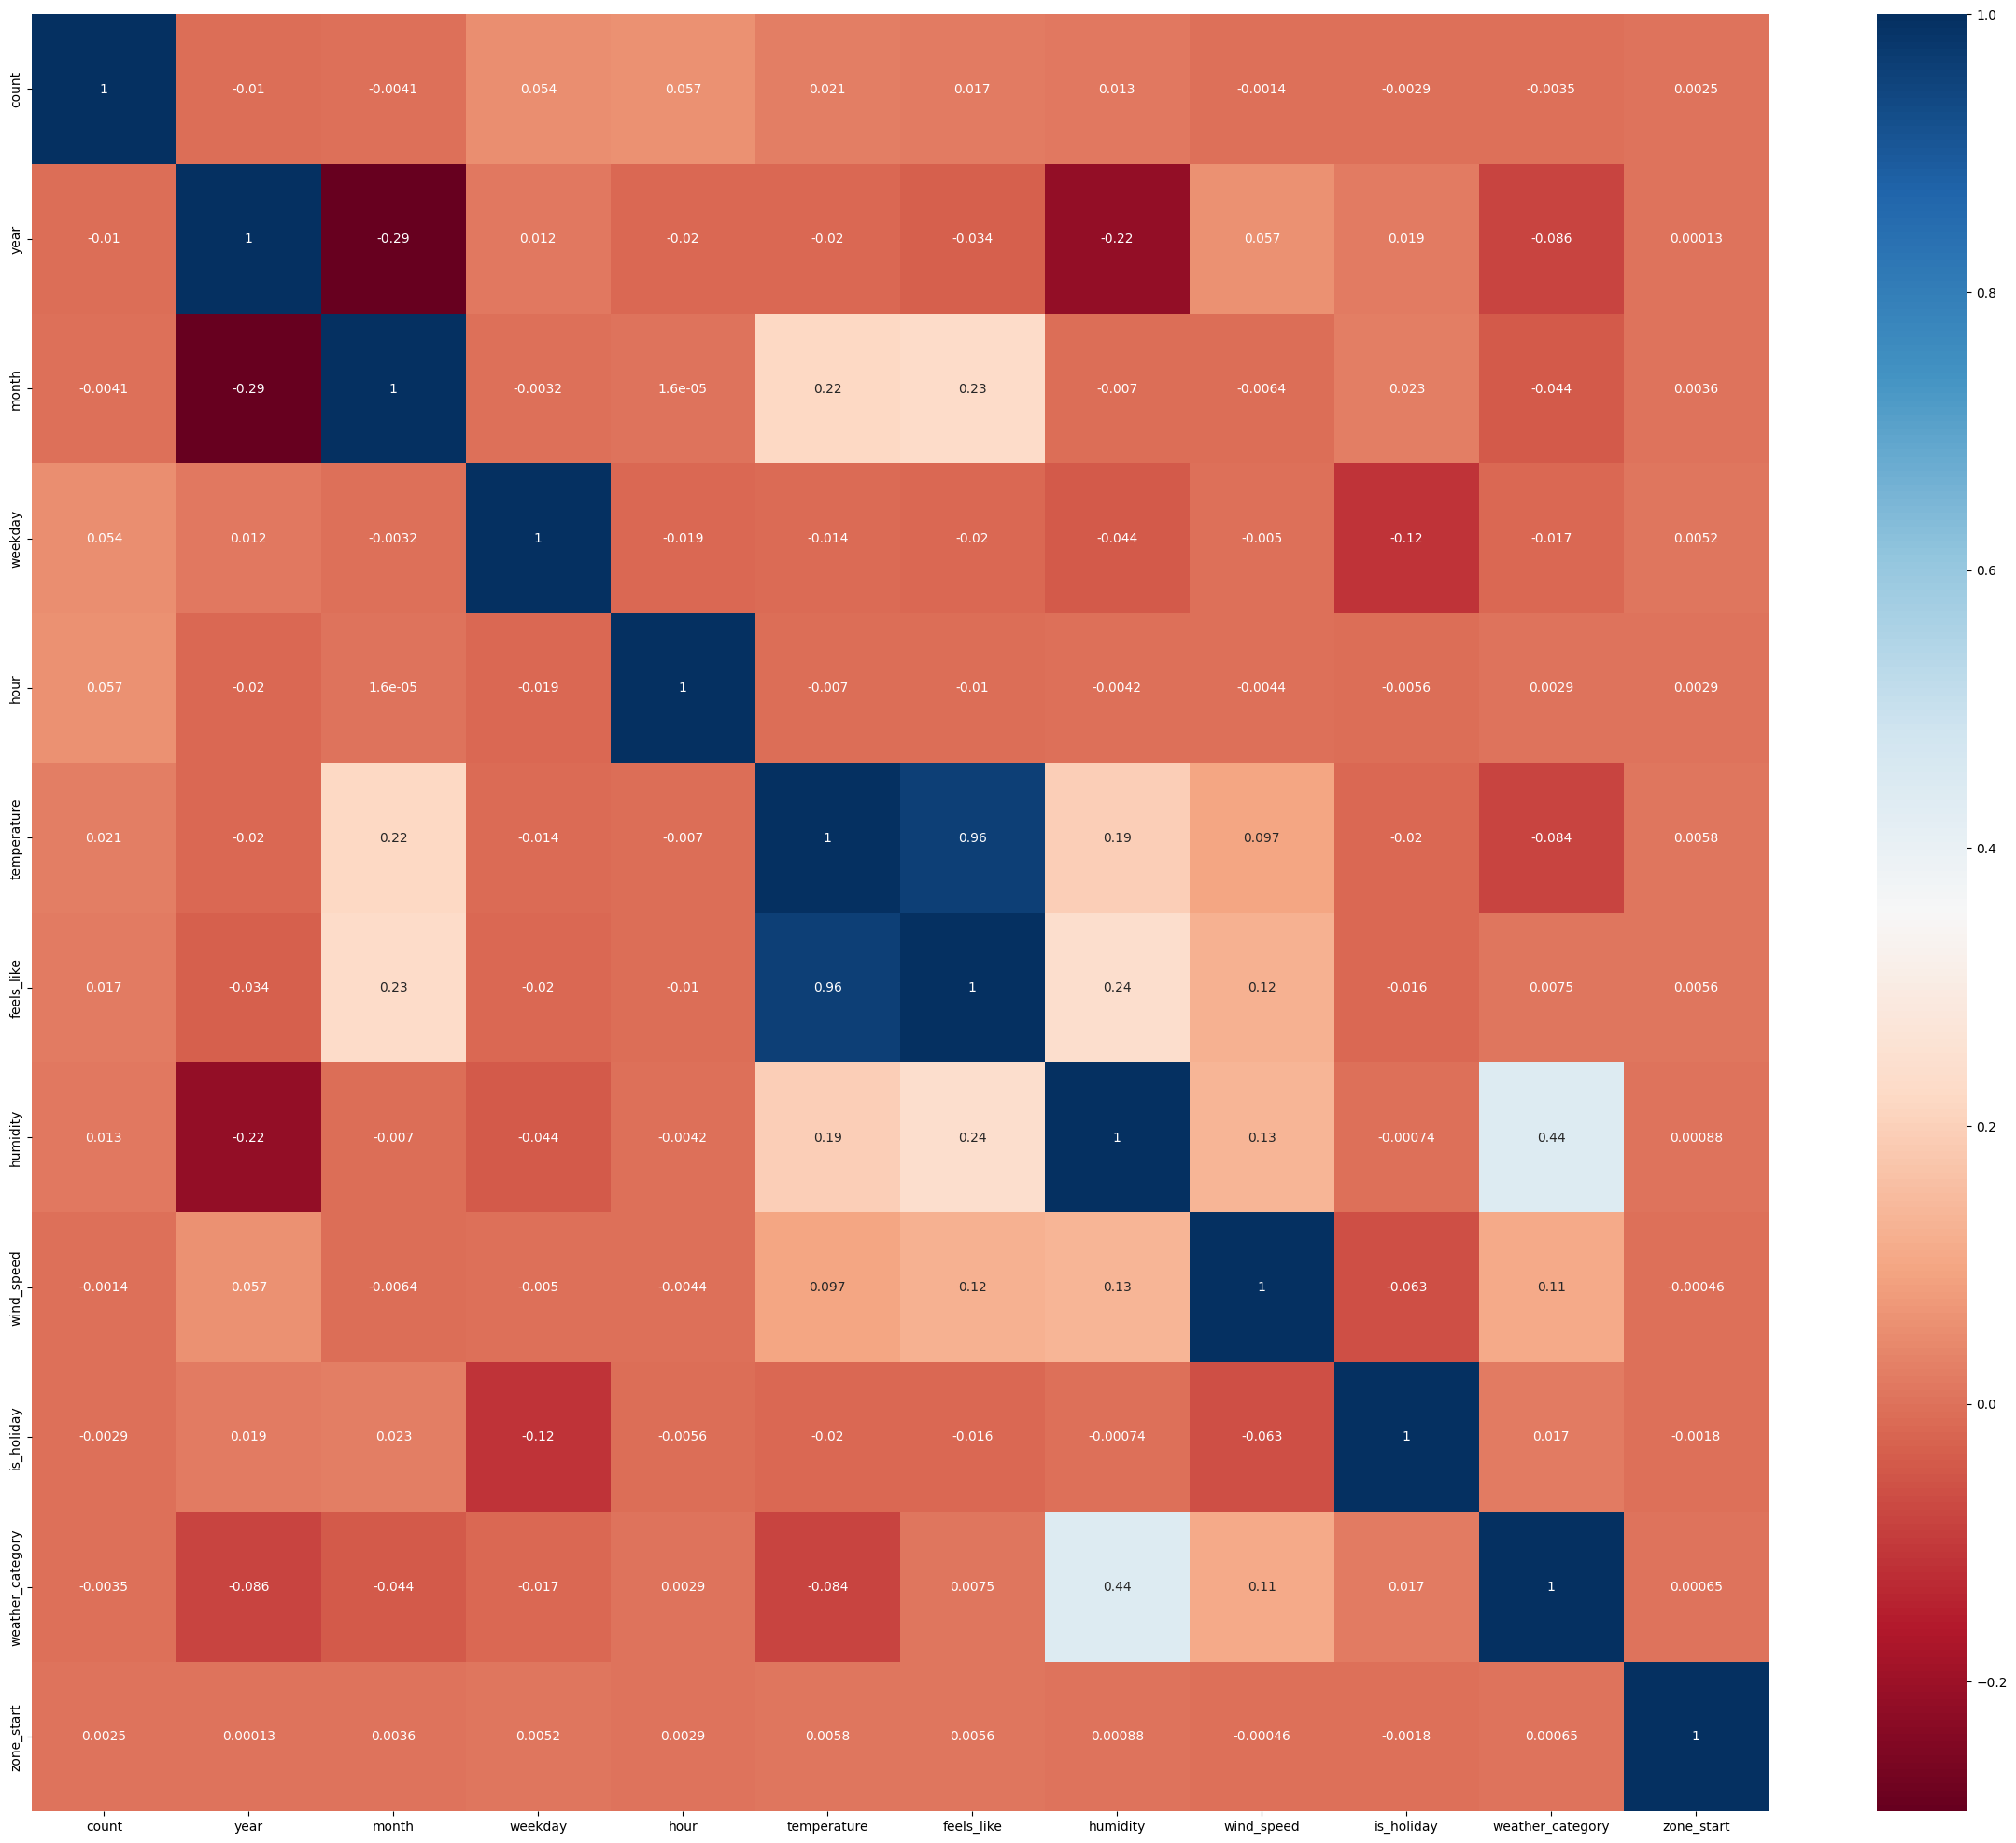

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (30,25))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

In [344]:
top_10_zones = df['zone_start'].value_counts().head(20)

In [345]:
top_10_zones

zone_start
48453001100    33399
48453000902    30775
48453001305    30692
48453000603    30600
48453000604    30109
48453001200    29593
48453000700    27578
48453001401    27219
48453002304    26778
48453001303    26320
48453000601    25492
48453001000    23421
48453000901    21743
48453000500    19474
48453000804    18255
48453000401    18125
48453000204    17235
48453001308    17067
48453002308    16640
48453002317    16633
Name: count, dtype: int64

In [346]:
top_10_zones = df['zone_start'].value_counts().head(20).index
#Create a new DataFrame that only contains the value of the zone_start column as the value in top_10_zones

df = df[df['zone_start'].isin(top_10_zones)]

In [347]:
Austin

,count,year,month,weekday,hour,date,temperature,feels_like,humidity,wind_speed,is_holiday,weather_category,zone_start
0,1,2018,4,2,18,2018-04-03,22,20,93,24,0,2,48453001738
1,1,2018,4,3,15,2018-04-04,14,13,58,23,0,1,48453001200
2,1,2018,4,3,17,2018-04-04,14,13,58,23,0,1,48453001100
3,1,2018,4,4,5,2018-04-05,18,12,54,8,0,1,48453001305
4,2,2018,4,4,8,2018-04-05,18,12,54,8,0,1,48453001305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858599,3,2022,4,1,10,2022-04-04,21,19,88,21,0,2,48453001911
858600,1,2022,4,1,10,2022-04-04,21,19,88,21,0,2,48453001919
858601,1,2022,4,1,10,2022-04-04,21,19,88,21,0,2,48453002304
858602,1,2022,4,1,10,2022-04-04,21,19,88,21,0,2,48453002316


In [348]:
zone_start_ohe = pd.get_dummies(df['zone_start'], prefix='zone_start')
df = pd.concat([df, zone_start_ohe], axis=1)
df.drop('zone_start', axis=1, inplace=True)

# One-hot encode 'weather_category'
weather_ohe = pd.get_dummies(df['weather_category'], prefix='weather_category')
df = pd.concat([df, weather_ohe], axis=1)
df.drop('weather_category', axis=1, inplace=True)

In [349]:
df

,count,year,month,weekday,hour,temperature,feels_like,humidity,wind_speed,is_holiday,...,zone_start_48453001308,zone_start_48453001401,zone_start_48453002304,zone_start_48453002308,zone_start_48453002317,weather_category_1,weather_category_2,weather_category_3,weather_category_4,weather_category_5
1,1,2018,4,3,15,14,13,58,23,0,...,False,False,False,False,False,True,False,False,False,False
2,1,2018,4,3,17,14,13,58,23,0,...,False,False,False,False,False,True,False,False,False,False
3,1,2018,4,4,5,18,12,54,8,0,...,False,False,False,False,False,True,False,False,False,False
4,2,2018,4,4,8,18,12,54,8,0,...,False,False,False,False,False,True,False,False,False,False
5,1,2018,4,4,10,18,12,54,8,0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858593,2,2022,4,1,10,21,19,88,21,0,...,False,False,False,False,False,False,True,False,False,False
858594,1,2022,4,1,10,21,19,88,21,0,...,True,False,False,False,False,False,True,False,False,False
858595,5,2022,4,1,10,21,19,88,21,0,...,False,True,False,False,False,False,True,False,False,False
858601,1,2022,4,1,10,21,19,88,21,0,...,False,False,True,False,False,False,True,False,False,False


In [350]:
#linear
# Define features and target variables
X = df.drop(['count'], axis=1)  # 假设 'date_hour' 是不需要的特征
y = df['count']
# Split the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3431.3184350610622


In [351]:
#logistic 
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict test set
y_pred = log_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

E:\Users\俊俊\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Squared Error: 5940.619963050395


In [352]:
#DecisionTree
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)

# Predict test set
y_pred = DT_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 485.84006979369804


In [353]:
#ExtraTreeRegressor 
ET_model = ExtraTreeRegressor()
ET_model.fit(X_train, y_train)

# Predict test set
y_pred = ET_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 665.635163707277


In [354]:
#LGBMRegressor 
lgb_model = lgb.LGBMRegressor(n_estimators=1000)
lgb_model.fit(X_train, y_train)

# Predict test set
y_pred = lgb_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 389718, number of used features: 34
[LightGBM] [Info] Start training from score 25.888368
Mean Squared Error: 339.6002921219506


In [355]:
#XGBRFRegressor 
xgb_model = xgb.XGBRFRegressor(n_estimators=1000, max_depth=9)
xgb_model.fit(X_train, y_train)

# Predict test set
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 971.7958189040219


In [356]:
#BaggingRegressor 
bagging_model = BaggingRegressor()
bagging_model.fit(X_train, y_train)

# Predict test set
y_pred = bagging_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 284.13093461972693


In [357]:
#GradientBoostingRegressor 
gbrt_model = GradientBoostingRegressor()
gbrt_model.fit(X_train, y_train)

# Predict test set
y_pred = gbrt_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1909.661376214445


In [358]:
#AdaBoostRegressor 
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

# Predict test set
y_pred = ada_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4793.637651911174


In [329]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train random forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)


feature_importances = rf_model.feature_importances_

# Get feature importance score
features = list(X.columns)
feature_importance_dict = dict(zip(features, feature_importances))


print("Feature Importances:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

#Print feature importance
selected_features = [feature for feature, importance in feature_importance_dict.items() if importance > 0.001]

# Re-partition the data using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the model using selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = rf_model.predict(X_test_selected)

# Evaluate the model
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)
r2_selected = r2_score(y_test, y_pred_selected)


print(f'RMSE (Selected Features): {rmse_selected}')
print(f'R^2 (Selected Features): {r2_selected}')


Feature Importances:
zone_start_48453001100: 0.34266700777864034
hour: 0.17607547259718473
year: 0.13907139823493408
weekday: 0.11102253549369213
month: 0.09845020248083944
humidity: 0.04556943371085943
temperature: 0.03779275505483403
feels_like: 0.011924771368650403
wind_speed: 0.007855468682962392
zone_start_48453001305: 0.00658702109678882
zone_start_48453000601: 0.004435567588802019
zone_start_48453000902: 0.004159132904306325
zone_start_48453000603: 0.0034329157478341418
zone_start_48453000604: 0.0031003796965813337
zone_start_48453001200: 0.0026032503454101823
is_holiday: 0.0018038781682682323
zone_start_48453000700: 0.00104293694759858
weather_category_1: 0.0007120553857454562
zone_start_48453001401: 0.0007094651813510295
weather_category_2: 0.0003455636545394213
weather_category_4: 0.0003171365048689192
weather_category_3: 0.00022742677522682804
zone_start_48453001303: 9.422392029456473e-05
weather_category_5: 6.797873809010635e-10
zone_start_48453000204: 0.0
zone_start_484530

In [359]:
import joblib
# Save the model to a file using Joblib
joblib.dump(rf_model, 'Austin_rf.joblib')
m = joblib.load('Austin_rf.joblib')
m

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=50,
                      random_state=42)

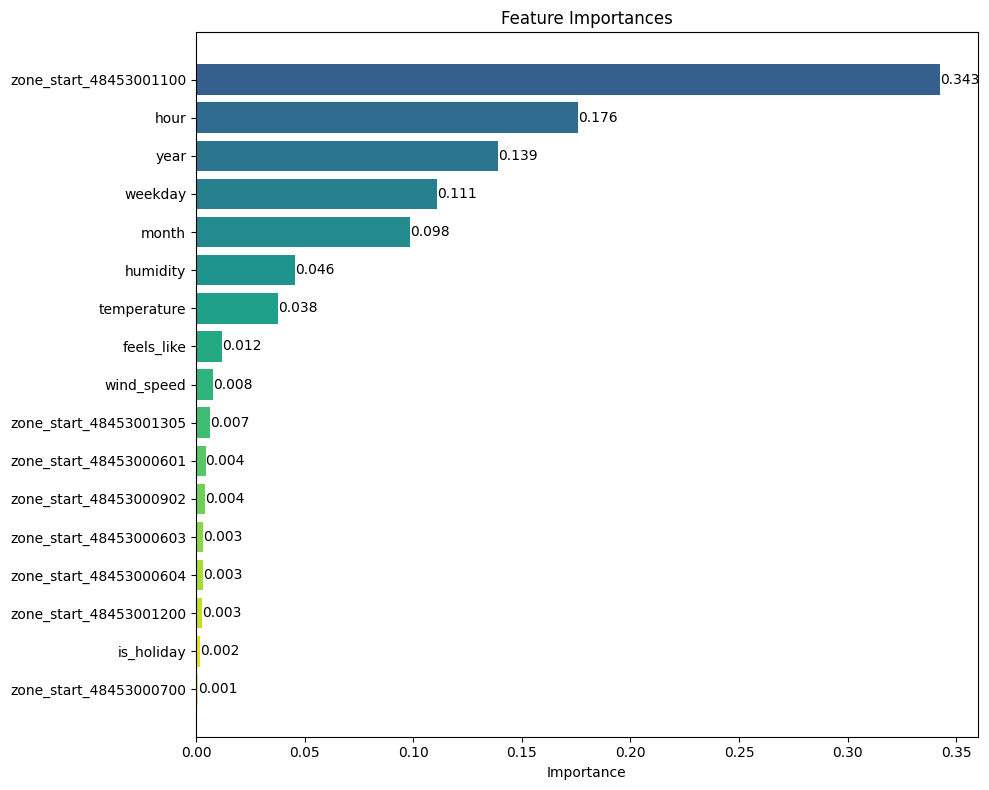

In [290]:
import matplotlib.pyplot as plt

feature_importances = {
    "zone_start_48453001100": 0.34266700777864034,
    "hour": 0.17607547259718473,
    "year": 0.13907139823493408,
    "weekday": 0.11102253549369213,
    "month": 0.09845020248083944,
    "humidity": 0.04556943371085943,
    "temperature": 0.03779275505483403,
    "feels_like": 0.011924771368650403,
    "wind_speed": 0.007855468682962392,
    "zone_start_48453001305": 0.00658702109678882,
    "zone_start_48453000601": 0.004435567588802019,
    "zone_start_48453000902": 0.004159132904306325,
    "zone_start_48453000603": 0.0034329157478341418,
    "zone_start_48453000604": 0.0031003796965813337,
    "zone_start_48453001200": 0.0026032503454101823,
    "is_holiday": 0.0018038781682682323,
    "zone_start_48453000700": 0.00104293694759858,
}

sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
sorted_features = [f for f in sorted_features if f[1] > 0]

features, importances = zip(*sorted_features)

plt.figure(figsize=(10, 8))
bars = plt.barh(features, importances, color=plt.cm.viridis(np.linspace(0.3, 1, len(features))))
plt.xlabel('Importance')
plt.title('Feature Importances')


for bar in bars:
    plt.text(
        bar.get_width(),    
        bar.get_y() + bar.get_height() / 2,  
        f'{bar.get_width():.3f}',  
        va='center', 
        ha='left'
    )


plt.tight_layout()
plt.gca().invert_yaxis() 
plt.show()



In [291]:
selected_features

['year',
 'month',
 'weekday',
 'hour',
 'temperature',
 'feels_like',
 'humidity',
 'wind_speed',
 'is_holiday',
 'zone_start_48453000601',
 'zone_start_48453000603',
 'zone_start_48453000604',
 'zone_start_48453000700',
 'zone_start_48453000902',
 'zone_start_48453001100',
 'zone_start_48453001200',
 'zone_start_48453001305']

In [292]:
from sklearn.model_selection import cross_val_score

score_pre = cross_val_score(rf_model, X_train, y_train, cv=10).mean()
score_pre

0.849994994839108

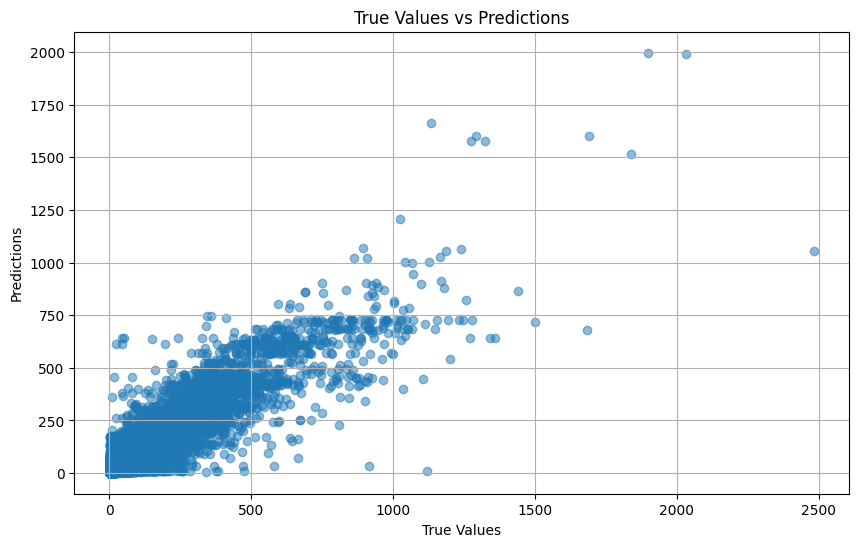

In [293]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_selected, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.grid(True)
plt.show()

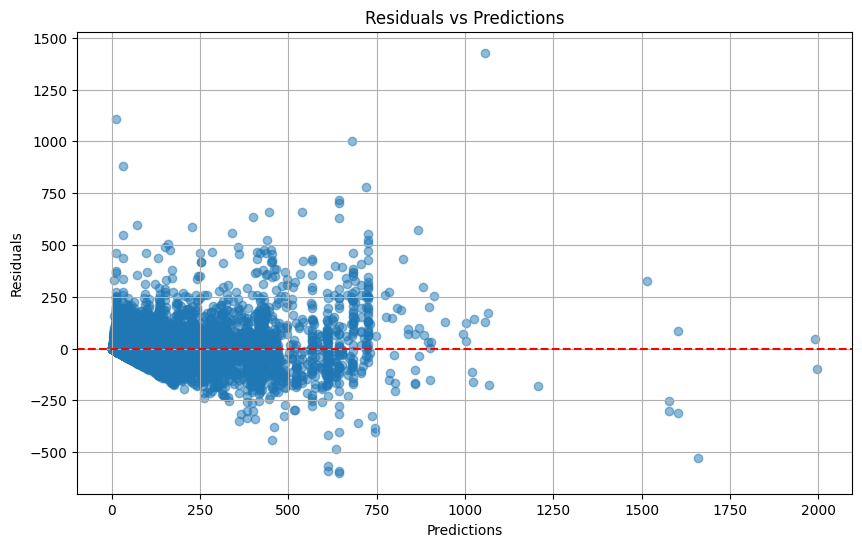

In [294]:
residuals = y_test - y_pred_selected

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_selected, residuals, alpha=0.5)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs Predictions')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [295]:
data_3day = pd.read_csv('data_3day.csv')

In [296]:
data_3day.rename(columns={'Month': 'month', 'Day of Week': 'weekday', 'Year': 'year', 'Hour': 'hour'}, inplace=True)

In [297]:
data_3day.drop(columns='predicted_count', inplace=True)

In [298]:
data_3day['zone_start'] = 48453001100

In [299]:
data_3day.columns

Index(['month', 'weekday', 'year', 'hour', 'temperature', 'feels_like',
       'humidity', 'weather_category', 'zone_start'],
      dtype='object')

In [300]:
zone_start_ohe_new = pd.get_dummies(data_3day['zone_start'], prefix='zone_start').astype(bool)
data_3day = pd.concat([data_3day, zone_start_ohe_new], axis=1)
data_3day.drop('zone_start', axis=1, inplace=True)

weather_ohe_new = pd.get_dummies(data_3day['weather_category'], prefix='weather_category').astype(bool)
data_3day = pd.concat([data_3day, weather_ohe_new], axis=1)
data_3day.drop('weather_category', axis=1, inplace=True)

In [301]:

train_columns = [
    'year', 'month', 'weekday', 'hour', 'temperature', 'feels_like', 'humidity', 'wind_speed', 'is_holiday',
    'zone_start_48453000601', 'zone_start_48453000603', 'zone_start_48453000604', 'zone_start_48453000700', 
    'zone_start_48453000902', 'zone_start_48453001100', 'zone_start_48453001200', 'zone_start_48453001305'
]

# Make sure the new dataset contains these columns
for col in train_columns:
    if col not in data_3day.columns:
        data_3day[col] = 0  


data_3day = data_3day[train_columns]

# Use the model to make predictions
predicted_counts = rf_model.predict(data_3day)

# Add the prediction results to the new data set
data_3day['predicted_count'] = predicted_counts


print(data_3day[['year', 'month', 'weekday', 'hour', 'temperature', 'feels_like', 'humidity', 'predicted_count']])


    year  month  weekday  hour  temperature  feels_like  humidity  \
0   2024      3        1     0         25.5        27.5        76   
1   2024      3        1     1         25.2        27.1        77   
2   2024      3        1     2         24.9        26.8        77   
3   2024      3        1     3         24.7        26.6        77   
4   2024      3        1     4         24.6        26.4        76   
..   ...    ...      ...   ...          ...         ...       ...   
67  2024      3        3    19         26.5        28.4        72   
68  2024      3        3    20         26.2        28.2        71   
69  2024      3        3    21         26.0        27.9        71   
70  2024      3        3    22         25.7        27.6        72   
71  2024      3        3    23         25.7        27.6        73   

    predicted_count  
0        183.490953  
1        117.422733  
2        116.034065  
3         15.211895  
4         10.285240  
..              ...  
67       277.8819

,year,month,weekday,hour,temperature,feels_like,humidity,wind_speed,is_holiday,zone_start_48453000601,zone_start_48453000603,zone_start_48453000604,zone_start_48453000700,zone_start_48453000902,zone_start_48453001100,zone_start_48453001200,zone_start_48453001305,predicted_count
0,2024,3,1,0,25.5,27.5,76,0,0,0,0,0,0,0,True,0,0,183.490953
1,2024,3,1,1,25.2,27.1,77,0,0,0,0,0,0,0,True,0,0,117.422733
2,2024,3,1,2,24.9,26.8,77,0,0,0,0,0,0,0,True,0,0,116.034065
3,2024,3,1,3,24.7,26.6,77,0,0,0,0,0,0,0,True,0,0,15.211895
4,2024,3,1,4,24.6,26.4,76,0,0,0,0,0,0,0,True,0,0,10.285240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024,3,3,19,26.5,28.4,72,0,0,0,0,0,0,0,True,0,0,277.881999
68,2024,3,3,20,26.2,28.2,71,0,0,0,0,0,0,0,True,0,0,277.881999
69,2024,3,3,21,26.0,27.9,71,0,0,0,0,0,0,0,True,0,0,276.287951
70,2024,3,3,22,25.7,27.6,72,0,0,0,0,0,0,0,True,0,0,276.287951


In [303]:

data_3day_1 = data_3day.drop_duplicates(subset=['predicted_count'])

In [304]:
data_3day_1

,year,month,weekday,hour,temperature,feels_like,humidity,wind_speed,is_holiday,zone_start_48453000601,zone_start_48453000603,zone_start_48453000604,zone_start_48453000700,zone_start_48453000902,zone_start_48453001100,zone_start_48453001200,zone_start_48453001305,predicted_count
0,2024,3,1,0,25.5,27.5,76,0,0,0,0,0,0,0,True,0,0,183.490953
1,2024,3,1,1,25.2,27.1,77,0,0,0,0,0,0,0,True,0,0,117.422733
2,2024,3,1,2,24.9,26.8,77,0,0,0,0,0,0,0,True,0,0,116.034065
3,2024,3,1,3,24.7,26.6,77,0,0,0,0,0,0,0,True,0,0,15.211895
4,2024,3,1,4,24.6,26.4,76,0,0,0,0,0,0,0,True,0,0,10.285240
5,2024,3,1,5,24.4,26.2,77,0,0,0,0,0,0,0,True,0,0,10.063236
6,2024,3,1,6,24.6,26.4,77,0,0,0,0,0,0,0,True,0,0,14.941657
7,2024,3,1,7,25.3,27.0,73,0,0,0,0,0,0,0,True,0,0,34.748548
8,2024,3,1,8,26.2,27.7,65,0,0,0,0,0,0,0,True,0,0,59.406406
9,2024,3,1,9,26.9,28.4,61,0,0,0,0,0,0,0,True,0,0,76.059148


In [305]:
data_1100

,count,year,month,weekday,hour,temperature,feels_like,humidity,wind_speed,is_holiday,weather_category,zone_start
188081,24,2019,3,1,0,0,-5,62,20,0,1,48453001100
188094,9,2019,3,1,1,0,-5,62,20,0,1,48453001100
188104,9,2019,3,1,2,0,-5,62,20,0,1,48453001100
188112,7,2019,3,1,3,0,-5,62,20,0,1,48453001100
188117,4,2019,3,1,4,0,-5,62,20,0,1,48453001100
...,...,...,...,...,...,...,...,...,...,...,...,...
854834,248,2022,3,3,19,22,21,84,36,0,3,48453001100
854882,197,2022,3,3,20,22,21,84,36,0,3,48453001100
854918,233,2022,3,3,21,22,21,84,36,0,3,48453001100
854952,219,2022,3,3,22,22,21,84,36,0,3,48453001100


In [306]:
#Group by hour and calculate the average count value for each hour
hourly_average = data_1100.groupby('hour')['count'].mean()
print(hourly_average)


hour
0     120.092593
1      68.740741
2      44.377358
3      12.488889
4       5.840000
5       9.076923
6      16.200000
7      33.148148
8      70.709091
9      85.981818
10    112.618182
11    159.236364
12    219.381818
13    243.018182
14    260.481481
15    288.200000
16    323.090909
17    368.727273
18    357.259259
19    320.345455
20    280.163636
21    257.166667
22    240.888889
23    196.944444
Name: count, dtype: float64


In [307]:
data_3day

,year,month,weekday,hour,temperature,feels_like,humidity,wind_speed,is_holiday,zone_start_48453000601,zone_start_48453000603,zone_start_48453000604,zone_start_48453000700,zone_start_48453000902,zone_start_48453001100,zone_start_48453001200,zone_start_48453001305,predicted_count
0,2024,3,1,0,25.5,27.5,76,0,0,0,0,0,0,0,True,0,0,183.490953
1,2024,3,1,1,25.2,27.1,77,0,0,0,0,0,0,0,True,0,0,117.422733
2,2024,3,1,2,24.9,26.8,77,0,0,0,0,0,0,0,True,0,0,116.034065
3,2024,3,1,3,24.7,26.6,77,0,0,0,0,0,0,0,True,0,0,15.211895
4,2024,3,1,4,24.6,26.4,76,0,0,0,0,0,0,0,True,0,0,10.285240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024,3,3,19,26.5,28.4,72,0,0,0,0,0,0,0,True,0,0,277.881999
68,2024,3,3,20,26.2,28.2,71,0,0,0,0,0,0,0,True,0,0,277.881999
69,2024,3,3,21,26.0,27.9,71,0,0,0,0,0,0,0,True,0,0,276.287951
70,2024,3,3,22,25.7,27.6,72,0,0,0,0,0,0,0,True,0,0,276.287951


In [308]:
#Group by hour and calculate the average count value for each hour
hourly_average = data_3day.groupby('hour')['predicted_count'].mean()

print(hourly_average)

hour
0     174.704998
1     112.475136
2     111.086468
3      15.211895
4      10.305968
5      10.211238
6      15.262454
7      33.958239
8      59.406406
9      76.059148
10     90.981689
11    203.644207
12    248.296076
13    242.112843
14    242.112843
15    248.562639
16    249.426094
17    277.503281
18    277.503281
19    277.503281
20    277.503281
21    275.909232
22    275.909232
23    266.343821
Name: predicted_count, dtype: float64


In [319]:
df1 = pd.DataFrame(data_3day_1)
data2 = {
    'hour': range(24),
    'avg': [174.704998, 112.475136, 111.086468, 15.211895, 10.305968, 10.211238, 15.262454, 33.958239, 59.406406, 76.059148, 90.981689, 203.644207, 248.296076, 242.112843, 242.112843, 248.562639, 249.426094, 277.503281, 277.503281, 277.503281, 277.503281, 275.909232, 275.909232, 266.343821]
}
df2 = pd.DataFrame(data2)
result = pd.merge(df1, df2, on='hour', how='left')

result

,year,month,weekday,hour,temperature,feels_like,humidity,wind_speed,is_holiday,zone_start_48453000601,zone_start_48453000603,zone_start_48453000604,zone_start_48453000700,zone_start_48453000902,zone_start_48453001100,zone_start_48453001200,zone_start_48453001305,predicted_count,avg
0,2024,3,1,0,25.5,27.5,76,0,0,0,0,0,0,0,True,0,0,183.490953,174.704998
1,2024,3,1,1,25.2,27.1,77,0,0,0,0,0,0,0,True,0,0,117.422733,112.475136
2,2024,3,1,2,24.9,26.8,77,0,0,0,0,0,0,0,True,0,0,116.034065,111.086468
3,2024,3,1,3,24.7,26.6,77,0,0,0,0,0,0,0,True,0,0,15.211895,15.211895
4,2024,3,1,4,24.6,26.4,76,0,0,0,0,0,0,0,True,0,0,10.285240,10.305968
5,2024,3,1,5,24.4,26.2,77,0,0,0,0,0,0,0,True,0,0,10.063236,10.211238
6,2024,3,1,6,24.6,26.4,77,0,0,0,0,0,0,0,True,0,0,14.941657,15.262454
7,2024,3,1,7,25.3,27.0,73,0,0,0,0,0,0,0,True,0,0,34.748548,33.958239
8,2024,3,1,8,26.2,27.7,65,0,0,0,0,0,0,0,True,0,0,59.406406,59.406406
9,2024,3,1,9,26.9,28.4,61,0,0,0,0,0,0,0,True,0,0,76.059148,76.059148


In [320]:
result['percentage_difference'] = ((result['predicted_count'] - result['avg']) / result['avg']) * 100
result


,year,month,weekday,hour,temperature,feels_like,humidity,wind_speed,is_holiday,zone_start_48453000601,zone_start_48453000603,zone_start_48453000604,zone_start_48453000700,zone_start_48453000902,zone_start_48453001100,zone_start_48453001200,zone_start_48453001305,predicted_count,avg,percentage_difference
0,2024,3,1,0,25.5,27.5,76,0,0,0,0,0,0,0,True,0,0,183.490953,174.704998,5.029023e+00
1,2024,3,1,1,25.2,27.1,77,0,0,0,0,0,0,0,True,0,0,117.422733,112.475136,4.398836e+00
2,2024,3,1,2,24.9,26.8,77,0,0,0,0,0,0,0,True,0,0,116.034065,111.086468,4.453825e+00
3,2024,3,1,3,24.7,26.6,77,0,0,0,0,0,0,0,True,0,0,15.211895,15.211895,1.415148e-06
4,2024,3,1,4,24.6,26.4,76,0,0,0,0,0,0,0,True,0,0,10.285240,10.305968,-2.011302e-01
5,2024,3,1,5,24.4,26.2,77,0,0,0,0,0,0,0,True,0,0,10.063236,10.211238,-1.449405e+00
6,2024,3,1,6,24.6,26.4,77,0,0,0,0,0,0,0,True,0,0,14.941657,15.262454,-2.101872e+00
7,2024,3,1,7,25.3,27.0,73,0,0,0,0,0,0,0,True,0,0,34.748548,33.958239,2.327295e+00
8,2024,3,1,8,26.2,27.7,65,0,0,0,0,0,0,0,True,0,0,59.406406,59.406406,-2.114470e-07
9,2024,3,1,9,26.9,28.4,61,0,0,0,0,0,0,0,True,0,0,76.059148,76.059148,-5.378615e-08


In [321]:
result['percentage_difference'] = (((result['predicted_count'] - result['avg']) / result['avg']) * 100).round(1)
result



,year,month,weekday,hour,temperature,feels_like,humidity,wind_speed,is_holiday,zone_start_48453000601,zone_start_48453000603,zone_start_48453000604,zone_start_48453000700,zone_start_48453000902,zone_start_48453001100,zone_start_48453001200,zone_start_48453001305,predicted_count,avg,percentage_difference
0,2024,3,1,0,25.5,27.5,76,0,0,0,0,0,0,0,True,0,0,183.490953,174.704998,5.0
1,2024,3,1,1,25.2,27.1,77,0,0,0,0,0,0,0,True,0,0,117.422733,112.475136,4.4
2,2024,3,1,2,24.9,26.8,77,0,0,0,0,0,0,0,True,0,0,116.034065,111.086468,4.5
3,2024,3,1,3,24.7,26.6,77,0,0,0,0,0,0,0,True,0,0,15.211895,15.211895,0.0
4,2024,3,1,4,24.6,26.4,76,0,0,0,0,0,0,0,True,0,0,10.285240,10.305968,-0.2
5,2024,3,1,5,24.4,26.2,77,0,0,0,0,0,0,0,True,0,0,10.063236,10.211238,-1.4
6,2024,3,1,6,24.6,26.4,77,0,0,0,0,0,0,0,True,0,0,14.941657,15.262454,-2.1
7,2024,3,1,7,25.3,27.0,73,0,0,0,0,0,0,0,True,0,0,34.748548,33.958239,2.3
8,2024,3,1,8,26.2,27.7,65,0,0,0,0,0,0,0,True,0,0,59.406406,59.406406,-0.0
9,2024,3,1,9,26.9,28.4,61,0,0,0,0,0,0,0,True,0,0,76.059148,76.059148,-0.0


In [322]:
filtered_df = result[result['percentage_difference'].abs() > 3]
filtered_df['percentage_difference'] = filtered_df['percentage_difference'].astype(str) + '%'
filtered_df



C:\Users\俊俊\AppData\Local\Temp\ipykernel_11776\1786669324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['percentage_difference'] = filtered_df['percentage_difference'].astype(str) + '%'


,year,month,weekday,hour,temperature,feels_like,humidity,wind_speed,is_holiday,zone_start_48453000601,zone_start_48453000603,zone_start_48453000604,zone_start_48453000700,zone_start_48453000902,zone_start_48453001100,zone_start_48453001200,zone_start_48453001305,predicted_count,avg,percentage_difference
0,2024,3,1,0,25.5,27.5,76,0,0,0,0,0,0,0,True,0,0,183.490953,174.704998,5.0%
1,2024,3,1,1,25.2,27.1,77,0,0,0,0,0,0,0,True,0,0,117.422733,112.475136,4.4%
2,2024,3,1,2,24.9,26.8,77,0,0,0,0,0,0,0,True,0,0,116.034065,111.086468,4.5%
13,2024,3,1,13,28.3,29.4,52,0,0,0,0,0,0,0,True,0,0,230.334675,242.112843,-4.9%
30,2024,3,2,23,26.0,28.1,74,0,0,0,0,0,0,0,True,0,0,246.582416,266.343821,-7.4%
31,2024,3,3,0,26.1,28.1,75,0,0,0,0,0,0,0,True,0,0,168.159953,174.704998,-3.7%
32,2024,3,3,1,26.0,28.0,73,0,0,0,0,0,0,0,True,0,0,107.578182,112.475136,-4.4%
33,2024,3,3,2,25.9,27.8,74,0,0,0,0,0,0,0,True,0,0,106.189514,111.086468,-4.4%


In [323]:
selected_columns = ['year', 'month', 'weekday', 'hour', 'temperature', 'feels_like', 'humidity', 'zone_start_48453001100', 'predicted_count', 'avg', 'percentage_difference']
final_df = filtered_df[selected_columns]
final_df



,year,month,weekday,hour,temperature,feels_like,humidity,zone_start_48453001100,predicted_count,avg,percentage_difference
0,2024,3,1,0,25.5,27.5,76,True,183.490953,174.704998,5.0%
1,2024,3,1,1,25.2,27.1,77,True,117.422733,112.475136,4.4%
2,2024,3,1,2,24.9,26.8,77,True,116.034065,111.086468,4.5%
13,2024,3,1,13,28.3,29.4,52,True,230.334675,242.112843,-4.9%
30,2024,3,2,23,26.0,28.1,74,True,246.582416,266.343821,-7.4%
31,2024,3,3,0,26.1,28.1,75,True,168.159953,174.704998,-3.7%
32,2024,3,3,1,26.0,28.0,73,True,107.578182,112.475136,-4.4%
33,2024,3,3,2,25.9,27.8,74,True,106.189514,111.086468,-4.4%
